## 프로젝트 : 마지막 정리

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/wine.csv")

In [3]:
df

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


**열의 합 구하기**

In [4]:
# 열의 합
df['ash'].sum()

421.24

In [5]:
sum_ash = 0
for val in df['ash']:
    sum_ash += val
print(sum_ash)

421.2400000000002


**열의 평균 구하기**

In [6]:
# 열의 평균
df['ash'].mean()

2.3665168539325845

In [7]:
sum_ash = 0
for val in df['ash']:
    sum_ash += val
mean_ash = sum_ash / len(df['ash'])
print(mean_ash)

2.3665168539325854


**열의 분산 구하기**

In [8]:
# 열의 분산
df['ash'].var()

0.07526463530756046

In [9]:
ss_ash = 0
for val in df['ash']:
    ss_ash += (val-mean_ash)**2
var_ash = ss_ash/(len(df['ash'])-1) # 1/n말고 1/(n-1)로 나눈 경우 
print(var_ash)

0.07526463530756043


**열의 표준편차 구하기**

In [10]:
# 열의 표준편차
df['ash'].std()

0.27434400906081485

In [11]:
std_ash = var_ash**0.5
print(std_ash)

0.2743440090608148


**공분산**

In [13]:
# 공분산
ash = df['ash']
ci = df['color_intensity']

In [14]:
np.cov(ash, ci)  # 공분산행렬 구하면 -> 대각원소가 분산 = 자기 자신에 대한 공분산은 분산이기 때문에 ! 

array([[0.07526464, 0.16465433],
       [0.16465433, 5.37444938]])

In [15]:
n = len(df['ash'])
mean_ash = ash.mean()
mean_ci = ci.mean()
res = 0
for i in range(0,n):
    res += (ash[i]-mean_ash)*(ci[i]-mean_ci)
covariance = res / (n-1)
print(covariance)

0.1646543266488922


In [16]:
# 행렬곱 @ 사용
((ash-mean_ash).T @ (ci-mean_ci))/n 

0.16372930234187602

In [17]:
((ash-mean_ash).T @ (ci-mean_ci))/(n-1)  # np.transpose = .T 

0.1646543266488923

**상관계수 coefficient**

In [26]:
# 대각원소 = 1
np.corrcoef(ash, ci)

array([[1.        , 0.25888726],
       [0.25888726, 1.        ]])

correlation을 구하면 대각원소 = 1 
- 값의 제한을 받음: -1 <= corr <= 1
- 0.6이상이면 강한 상관관계 but 위에는 0.2588이니까 다소 약한 상관관계 

**히스토그램**

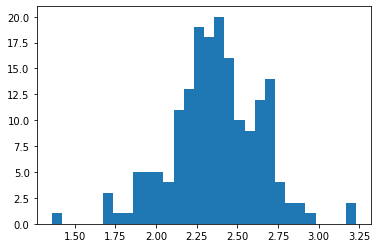

In [28]:
# 정규분포를 따름
plt.hist(df['ash'], bins=30)
plt.show()

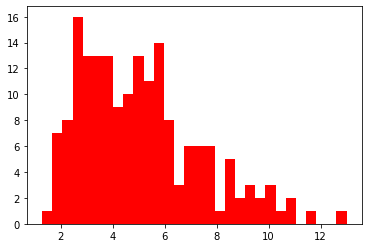

In [29]:
# 카이제곱, 감마분포, 베타분포를 따름 
plt.hist(df['color_intensity'], bins=30, color='red')
plt.show()

- 조건부확률

In [30]:
# ash > 2.5일 때 color intensity > 8 일 확률
ash25 = df[df['ash']>2.5]
ci8 = ash25[ash25['color_intensity']>8]

In [31]:
len(ci8) / len(ash25)

0.1346153846153846

**가설검정**  
- H0 (귀무가설): 그룹 A의 평균 alcohol 수치와 그룹 B의 평균 alcohol 수치는 차이가 없다.
- H1 (대립가설): 그룹 A의 평균 alcohol 수치는 그룹 B의 평균 alcohol 수치보다 크다.

In [36]:
# 2.35는 각 df의 개수를 맞추기 위한 임의의 값
df_A = df[df['ash']>2.35] 
df_B = df[df['ash']<=2.35] 

In [37]:
len(df_A)

92

In [38]:
len(df_B)

86

In [39]:
df_A['alcohol']

0      14.23
2      13.16
3      14.37
4      13.24
5      14.20
       ...  
172    14.16
173    13.71
174    13.40
176    13.17
177    14.13
Name: alcohol, Length: 92, dtype: float64

In [40]:
df_B['alcohol']

1      13.20
8      14.83
9      13.86
10     14.10
11     14.12
       ...  
165    13.73
167    12.82
170    12.20
171    12.77
175    13.27
Name: alcohol, Length: 86, dtype: float64

- 두 집단 평균 차이 검정 
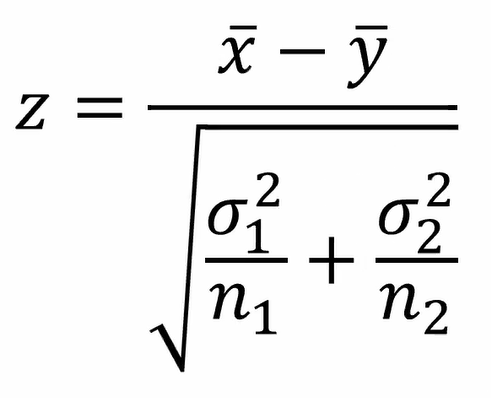

In [41]:
a = df_A['alcohol']
b = df_B['alcohol']

n1 = len(a)
n2 = len(b)

mean_a = a.mean()
mean_b = b.mean()
print(mean_a)
print(mean_b)

var_a = a.var()
var_b = b.var()

s = ((var_a/n1)+(var_b/n2))**0.5
print(s)

13.17184782608696
12.817441860465117
0.1187450948483407


- 검정통계량 값 -> z-value 구하기 

In [42]:
z_value = (mean_a - mean_b)/s
print(z_value)

2.984594572723069


In [43]:
z_dist = stats.norm(0,1)  # 표준화
p_value = 1 - z_dist.cdf(z_value)

- p-value < 0.05 이면 귀무가설 기각 ! 

In [44]:
p_value

0.0014197720399458102

**가설 검정 - 세 집단 평균 차이 검정**
> 가설 총 3개임

In [46]:
df_A = df[df['ash']<2.28] 
df_B = df[(df['ash']>=2.28)&(df['ash']<=2.47)]
df_C = df[df['ash']>2.47] 

In [47]:
a = df_A['alcohol']
b = df_B['alcohol']
c = df_C['alcohol']

In [48]:
n1 = len(a)
n2 = len(b) 
n3 = len(c) 
print(n1)
print(n2)
print(n3)

59
58
61


In [49]:
# 정규성 검정
test_stat, p = stats.shapiro(a)  # 샤피로 월크 테스트
print("검정통계량: {}, p-value: {}".format(test_stat,p))

test_stat, p = stats.shapiro(b)  
print("검정통계량: {}, p-value: {}".format(test_stat,p))

test_stat, p = stats.shapiro(c)  
print("검정통계량: {}, p-value: {}".format(test_stat,p))

검정통계량: 0.9709163308143616, p-value: 0.16921241581439972
검정통계량: 0.9692205190658569, p-value: 0.14712165296077728
검정통계량: 0.9448610544204712, p-value: 0.008268149569630623


- c의 p-value < 0.05이므로 귀무가설 기각 => 정규 분포를 따르지 않는다

In [51]:
# 분산 동질성 검정
stats.bartlett(a,b,c)

BartlettResult(statistic=1.2778020504976038, pvalue=0.5278722236377734)

- p-value > 0.05 이므로 귀무가설 채택 
> 그룹 a, b, c의 분산이 동일하다 

In [52]:
f_val, p_val = stats.f_oneway(a, b, c)  # ANOVA 검정
print('F-통계량: ', f_val)
print('p-value: ', p_val)

F-통계량:  5.153211984906106
p-value:  0.006689793066378117


In [54]:
f_val, p_val = stats.kruskal(a, b, c)  # 크루스칼 왈리스 테스트
print('F-통계량: ', f_val)
print('p-value: ', p_val)

F-통계량:  10.300136172298497
p-value:  0.0057990098811482715


- p-value < 0.05 이므로 귀무가설 기각, H1 채택